In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
# define constant

FOLDER = 'datas/s40d30t1.6/'
GESTURES = ["topl", "twistl", "side", "downl", "twistr", "topr", "downr","unknown"]

DATA_POINT_PER_GESTURE = 30

TARGET_DATA_POINT = 15

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Process data

In [3]:
inputs = []
outputs = []

ONE_HOTS = np.eye(len(GESTURES))

for i in range(len(GESTURES)):
    g = GESTURES[i]
    print(f"Processing {i} for gesture '{g}'.")

    output = ONE_HOTS[i]

    df = pd.read_csv(FOLDER + g + '.csv')
    num_recordings = int(df.shape[0] / DATA_POINT_PER_GESTURE)

    for j in range(num_recordings):
        tensor = []
        
        for k in range(DATA_POINT_PER_GESTURE):
            kk = j * DATA_POINT_PER_GESTURE + k
            if k < TARGET_DATA_POINT:
                tensor += [df['aX'][kk], df['aY'][kk], df['aZ'][kk], df['gX'][kk], df['gY'][kk], df['gZ'][kk]]
        
        inputs.append(tensor)
        outputs.append(output)



Processing 0 for gesture 'topl'.
Processing 1 for gesture 'twistl'.
Processing 2 for gesture 'side'.
Processing 3 for gesture 'downl'.
Processing 4 for gesture 'twistr'.
Processing 5 for gesture 'topr'.
Processing 6 for gesture 'downr'.
Processing 7 for gesture 'unknown'.


## Create train/validate/test datas

In [4]:
rdm_index = np.arange(len(inputs))
np.random.shuffle(rdm_index)

inputs = np.array(inputs)[rdm_index]
outputs = np.array(outputs)[rdm_index]

TRAIN_SPLIT = int(0.5 * len(inputs))
TEST_SPLIT = int(TRAIN_SPLIT + 0.25 * len(inputs))
i_train, i_validate, i_test = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
o_train, o_validate, o_test = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

i_train = tf.convert_to_tensor(i_train, dtype=tf.float32)
o_train = tf.convert_to_tensor(o_train, dtype=tf.float32)
i_validate = tf.convert_to_tensor(i_validate, dtype=tf.float32)
o_validate = tf.convert_to_tensor(o_validate, dtype=tf.float32)

i_test = tf.convert_to_tensor(i_test, dtype=tf.float32)

## Build and train model

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

EPOCHS=200

In [6]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(len(GESTURES), activation='softmax')
    ])
    
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(i_train, o_train, epochs=EPOCHS, batch_size=1,validation_data=(i_validate, o_validate))


Epoch 1/150
160/160 [==============================] - 1s 3ms/step - loss: 2.0077 - accuracy: 0.3125 - val_loss: 1.7592 - val_accuracy: 0.5500
Epoch 2/150
160/160 [==============================] - 0s 3ms/step - loss: 1.5113 - accuracy: 0.5500 - val_loss: 1.3084 - val_accuracy: 0.6750
Epoch 3/150
160/160 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.7312 - val_loss: 1.0580 - val_accuracy: 0.6625
Epoch 4/150
160/160 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.7250 - val_loss: 1.0475 - val_accuracy: 0.6250
Epoch 5/150
160/160 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.8188 - val_loss: 0.6524 - val_accuracy: 0.8750
Epoch 6/150
160/160 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8375 - val_loss: 0.7291 - val_accuracy: 0.7625
Epoch 7/150
160/160 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.8500 - val_loss: 0.5050 - val_accuracy: 0.8750

Epoch 58/150
160/160 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9937 - val_loss: 0.0280 - val_accuracy: 0.9875
Epoch 59/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9875
Epoch 60/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 61/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9875
Epoch 62/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0622 - val_accuracy: 0.9750
Epoch 63/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0580 - val_accuracy: 0.9875
Epoch 64/150
160/160 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy:

Epoch 115/150
160/160 [==============================] - 0s 3ms/step - loss: 9.4235e-04 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 0.9875
Epoch 116/150
160/160 [==============================] - 0s 3ms/step - loss: 8.6254e-04 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9875
Epoch 117/150
160/160 [==============================] - 0s 3ms/step - loss: 9.1771e-04 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9875
Epoch 118/150
160/160 [==============================] - 0s 3ms/step - loss: 9.2909e-04 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9875
Epoch 119/150
160/160 [==============================] - 0s 3ms/step - loss: 8.7594e-04 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 120/150
160/160 [==============================] - 0s 3ms/step - loss: 8.0758e-04 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9875
Epoch 121/150
160/160 [==============================] - 0s 3ms/step - loss: 7.2318e-04 - accuracy: 1.0000

## Review models' performance

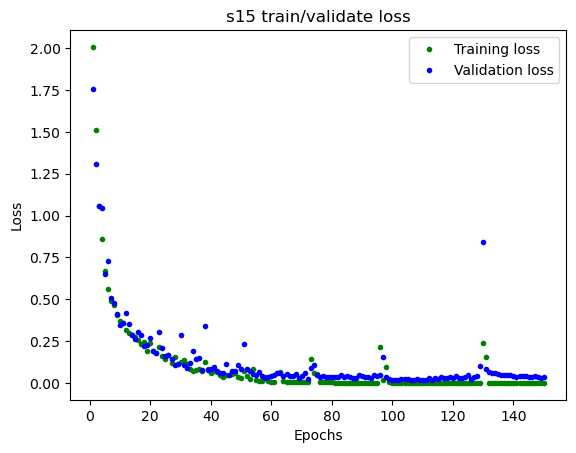

In [7]:
# increase the size of the graphs. The default size is (6,4).
# fig, axs = plt.subplots(1, 1, figsize=(9, 9))
# fig.tight_layout(pad=3.0)
# def plot_model_loss(history, title, i):
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('s15 train/validate loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#     ax.show()

# for i, s in enumerate(histories):
#     plot_model_loss(histories[s], 'Model s'+ str(s) + ' train/validate loss', i)

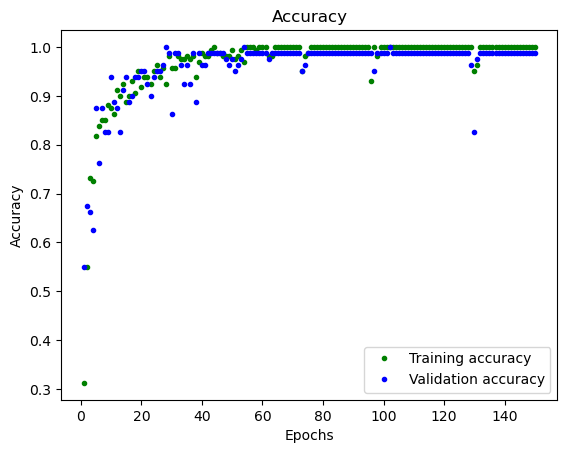

In [8]:
# increase the size of the graphs. The default size is (6,4).
# fig, axs = plt.subplots(1, 1, figsize=(9, 9))
# fig.tight_layout(pad=3.0)
# def plot_model_accuracy(history, title, i):
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# ax = axs[0, 0]
plt.plot(epochs, accuracy, 'g.', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b.', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# for i, s in enumerate(histories):
#     plot_model_accuracy(histories[s], 'Model s'+ str(s) + ' accuracy', i)

## Verify models with test data

3/3 [==============================] - 0s 2ms/step


Text(33.22222222222222, 0.5, 'Predicted labels')

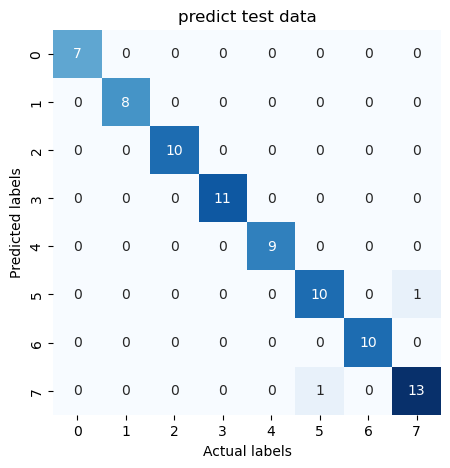

In [9]:
plt.figure(figsize=(5, 5))
predict = model.predict(i_test)
conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict, axis=1))
# ax = axs[0,0]
sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('predict test data')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')


## Produce model file (.tflite)

Output both non-quantized and quantized model files


In [10]:
def representative_dataset_generator():
     # each scalar value inside a 2D array that is wrapped in a list
     for value in inputs:
         yield [np.array(value, dtype=np.float32, ndmin=2)]

TFLITE_FILE = 'tflite/final/gesture_model_f_s15.tflite'
TFLITE_FILE_Q = 'tflite/final/gesture_model_f_s15q.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(TFLITE_FILE, "wb").write(tflite_model)

converter_q = tf.lite.TFLiteConverter.from_keras_model(model)
converter_q.optimizations = [tf.lite.Optimize.DEFAULT]
converter_q.representative_dataset = representative_dataset_generator
tflite_model_q = converter_q.convert()
open(TFLITE_FILE_Q, "wb").write(tflite_model_q)

# Review size difference
basic_model_size = os.path.getsize(TFLITE_FILE)
print("Basic model is {} bytes".format(basic_model_size))

basic_model_size_q = os.path.getsize(TFLITE_FILE_Q)
print("Quantized model is {} bytes".format(basic_model_size_q))


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpk2is63vl\assets
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpgka0lwlu\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpgka0lwlu\assets


Basic model is 30092 bytes
Quantized model is 10096 bytes


C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Verify the interpreter (.tflite)

Text(33.22222222222222, 0.5, 'Predicted labels')

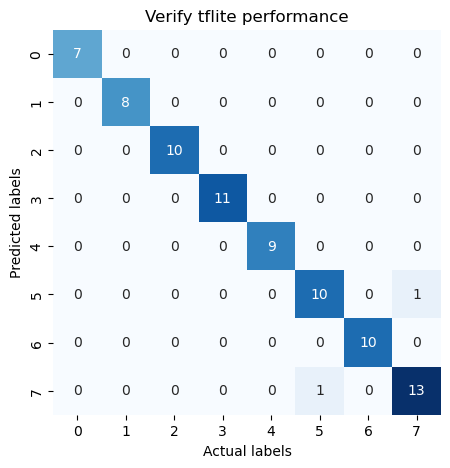

In [11]:

TFLITE_FILE = 'tflite/final/gesture_model_f_s15.tflite'
model_tf = tf.lite.Interpreter(TFLITE_FILE)
model_tf.allocate_tensors()
model_tf_input_index = model_tf.get_input_details()[0]['index']
model_tf_output_index = model_tf.get_output_details()[0]['index']
predict_tf = []
for j in i_test:
# write the value to the input tensor
    i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
    model_tf.set_tensor(model_tf_input_index, i_tensor)
    # run inference
    model_tf.invoke()
    # read the prediction from the output tensor
    predict_tf.append(model_tf.get_tensor(model_tf_output_index)[0])

conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict_tf, axis=1))

plt.figure(figsize=(5, 5))

sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title("Verify tflite performance")
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")


## Verify the quantized interpreter (.tflite)

Text(33.22222222222222, 0.5, 'Predicted labels')

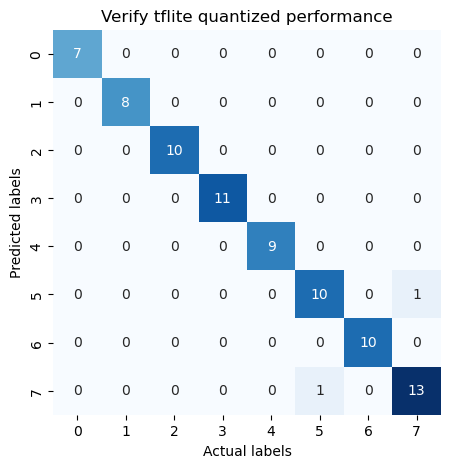

In [12]:

TFLITE_FILE_Q = 'tflite/final/gesture_model_f_s15q.tflite'
model_tf_q = tf.lite.Interpreter(TFLITE_FILE_Q)
model_tf_q.allocate_tensors()
model_tf_q_input_index = model_tf_q.get_input_details()[0]['index']
model_tf_q_output_index = model_tf_q.get_output_details()[0]['index']
predict_tf_q = []
for j in i_test:
# write the value to the input tensor
    i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
    model_tf_q.set_tensor(model_tf_q_input_index, i_tensor)
    # run inference
    model_tf_q.invoke()
    # read the prediction from the output tensor
    predict_tf_q.append(model_tf_q.get_tensor(model_tf_q_output_index)[0])

conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict_tf_q, axis=1))
plt.figure(figsize=(5, 5))

sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title("Verify tflite quantized performance")
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")


## Produce the model header file

In [13]:
# to run below command, ensure jupyter notebook is launched under bash terminal (eg. git bash, linux terminal)
TFLITE_FILE = 'tflite/final/gesture_model_f_s15.tflite'
TFLITE_FILE_Q = 'tflite/final/gesture_model_f_s15q.tflite'

HEADER_FILE = '../ble_client/final/gesture_model_f_s15.h'
HEADER_FILE_Q = '../ble_client/final/gesture_model_f_s15q.h'
# based model header file
str1 = "const unsigned char {} [] = {{".format('gesture_model')
str2 = "};"

!echo {str1}  > {HEADER_FILE}
!cat {TFLITE_FILE} | xxd -i >> {HEADER_FILE}
!echo {str2} >> {HEADER_FILE}

# quantized model header file
str3 = "const unsigned char {} [] = {{".format('gesture_model_q')

!echo {str3}  > {HEADER_FILE_Q}
!cat {TFLITE_FILE_Q} | xxd -i >> {HEADER_FILE_Q}
!echo {str2} >> {HEADER_FILE_Q}